<a href="https://colab.research.google.com/github/RuthStowers/MAT422/blob/main/Homework_4_2_Spectral_Graph_Bipartitioning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4.2

###Spectral Graph Bipartitioning

Graph partition aims to find out a partition such that the cut (the total number of edges between two disjoint sets of nodes) is minimized. For a weighted graph $G = (V,E)$, given a bipartition of $V$ into disjoint $V_1$ and $V_2$ $(V_1 \cup V_2 = V)$, the cut between them can be defined as
$$cut(V_1,V_2) = \sum_{i\in V_1,j\in V_2} M_{ij}.$$

The definition of cut is easily extended to k vertex subsets
$$cut(V_1,V_2,\cdots V_k) = \sum_{i<j} cut(V_i,V_j). $$
The classical graph bipartitioning problem is to find nearly equally-sized vertex subset $V_1,V_2$ of $V$ such that cut$(V^*_1,V_2^*)= \min_{V_1,V_2}\text{cut} (V_1,V_2)$. For this
purpose, let us define the partition vector $\textbf{p}$ that captures this division.

In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [7]:
# Set random state.
rs = np.random.seed(25)

def generate_circle_sample_data(r, n, sigma):
    """Generate circle data with random Gaussian noise."""
    angles = np.random.uniform(low=0, high=2*np.pi, size=n)

    x_epsilon = np.random.normal(loc=0.0, scale=sigma, size=n)
    y_epsilon = np.random.normal(loc=0.0, scale=sigma, size=n)

    x = r*np.cos(angles) + x_epsilon
    y = r*np.sin(angles) + y_epsilon
    return x, y

def generate_concentric_circles_data(param_list):
    """Generates many circle data with random Gaussian noise."""
    coordinates = [
        generate_circle_sample_data(param[0], param[1], param[2])
     for param in param_list
    ]
    return coordinates

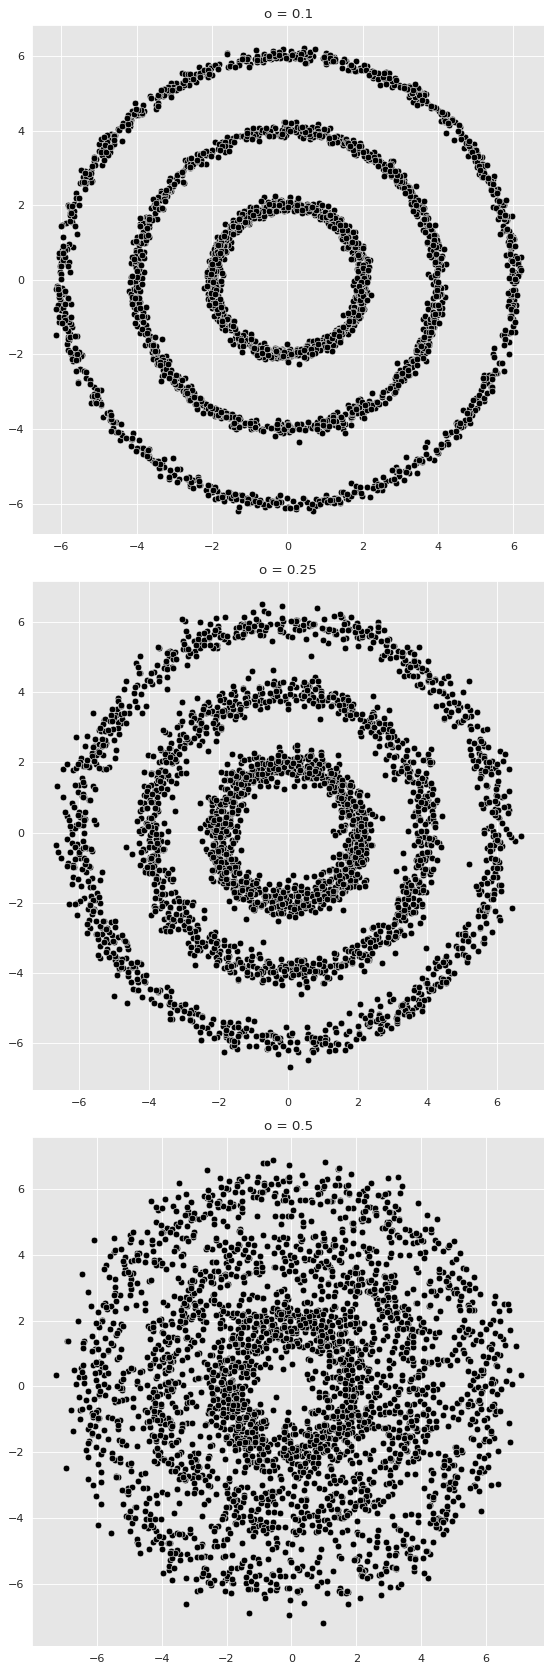

In [10]:
# Set global plot parameters.
plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams['figure.dpi'] = 80

# Number of points per circle.
n = 1000
# Radius.
r_list =[2, 4, 6]
# Standar deviation (Gaussian noise).
sigmas = [0.1, 0.25, 0.5]

param_lists = [[(r, n, sigma) for r in r_list] for sigma in sigmas]
# We store the data on this list.
coordinates_list = []

fig, axes = plt.subplots(3, 1, figsize=(7, 21))

for i, param_list in enumerate(param_lists):

    coordinates = generate_concentric_circles_data(param_list)

    coordinates_list.append(coordinates)

    ax = axes[i]

    for j in range(0, len(coordinates)):

        x, y = coordinates[j]
        sns.scatterplot(x=x, y=y, color='black', ax=ax)
        ax.set(title=f'o = {param_list[0][2]}')

plt.tight_layout()

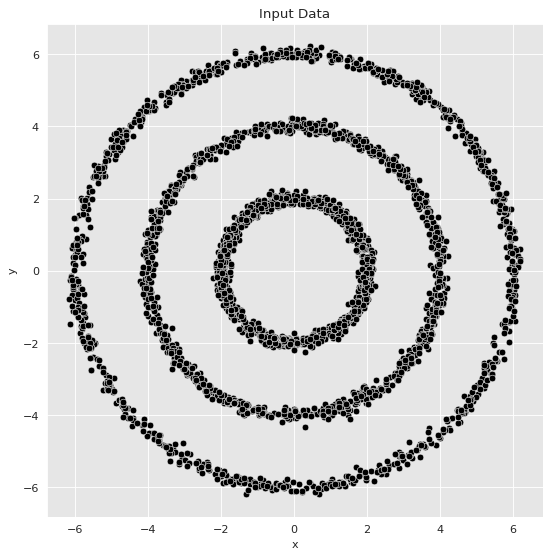

In [11]:
from itertools import chain

coordinates = coordinates_list[0]

def data_frame_from_coordinates(coordinates):
    """From coordinates to data frame."""
    xs = chain(*[c[0] for c in coordinates])
    ys = chain(*[c[1] for c in coordinates])

    return pd.DataFrame(data={'x': xs, 'y': ys})

data_df = data_frame_from_coordinates(coordinates)

# Plot the input data.
fig, ax = plt.subplots()
sns.scatterplot(x='x', y='y', color='black', data=data_df, ax=ax)
ax.set(title='Input Data');

####Lemma 4.2.1
Given the Laplacian matrix $L$ of $G$ and a partition vector $\textbf{p}$, the Rayleigh Quotient
$$\frac{\textbf{p}^TL\textbf{p}}{\textbf{p}^T\textbf{p}}=\frac{1}{n}\cdot 4 \text{cut}(V_1,V_2)$$

####Theorem 4.2.2
The serialized partition vector $\textbf{q} = (q_i)$
$$q_i = \begin{cases}+\sqrt{\frac{v_2}{v_1}}, i\in V_1,\\
-\sqrt{\frac{v_2}{v_1}}, i\in V_2.\end{cases}$$
satisfies
1. $$\textbf{q}^TW\textbf{e}=0, \textbf{q}^TW\textbf{q}=v_1+v_2$$
2. $$\frac{\textbf{q}^TL\textbf{q}}{\textbf{q}^TW\textbf{q}}=\frac{\text{cut}(V_1,V_2)}{v_1}+\frac{\text{cut}(V_1,V_2)}{v_2}.$$

The problem
$$\min_{q\neq 0}\frac{\textbf{q}^TL\textbf{q}}{\textbf{q}^TW\textbf{q}}, \text{ subject to } \textbf{q}^TW\textbf{e}=0, $$
is solved when $\textbf{q}$ is the eigenvector corresponding to the second smallest eigenvalue $\lambda_2$ of the generalized eigenvalue problem,
$$L\textbf{x}=\lambda W \textbf{x}.$$


Now we choose a weight$(i) = 1$ for all vertices $i$. This leads to the ratio-cut objective,
$$\text{Ratio-cut}(V_1,V_2) = \frac{\text{cut}(V_1,V_2)}{|V_1|}+\frac{\text{cut}(V_1,V_2)}{|V_2|}.$$

One commonly used $W = \text{diag}(w_{ii})$ is to choose $w_{ii}$ to be the sum of the weights of edges incident on the node i, i.e., $w_{ii} = \sum_k E_{ik}$. This leads to the normalized cut criterion that was for image segmentation. Note that for this choice of vertex weights, the vertex weight matrix $W$ equals the degree matrix $D$, and weight

$$\sum_{j\in V_i}w_{j j} = \text{cut}(V_1,V_2) +\text{within}(V_i)$$

for $i = 1,2$, where within ($V_i$) is the sum of the weights of edges with both endpoints in $V_i$.


Then the normalized-cut objective function may be expressed as
$$\text{Normalized-cut}(V_1,V_2) = \frac{\text{cut}(V_1,V_2)}{\sum_{i\in V_1}w_{ii}}+\frac{\text{cut}(V_1,V_2)}{\sum_{i\in V_1}w_{ii}}=2-S(V_1,V_2),$$
where $S(V_1,V_2)=\frac{\text{within}(V_1)}{\sum_{i\in V_1}w_{ii}}+\frac{\text{within}(V_2)}{\sum_{i\in V_2}w_{ii}}$. Note that $S(V_1,V_2)$ describes the strengths of associations within each partition. As a result, minimizing the normalized-cut is to maximize the proportion of edge weights that lie within each partition while balancing the cut. To demonstrate the two cuts, we examine the two examples.